In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

aerosol data

In [3]:
aero_data = {'species' : ['SO4', 'NO3', 'Cl', 'NH4', 'MSA', 'ARO1', 'ARO2', 'ALK1', 'OLE1', 'API1', 'API2', 'LIM1', 'LIM2', 'CO3', 'Na', 'Ca ', 'OIN', 'OC', 'BC', 'H2O'],
             'density' : [1800, 1800, 2200, 1800, 1800, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 1400, 2600, 2200, 2600, 2600, 1000, 1800, 1000],
             'ions' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             'molec_weight' : [96, 62, 35.5, 18, 95, 150,150, 140, 140, 184, 184, 200, 200, 60, 23, 40, 1, 1, 1, 18],
             'kappa' : [0.65, 0.65, 0.53, 0.65, 0.53, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.53, 0.53, 0.53, 0.1, 0.001, 0, 0]}
aero_file=pd.DataFrame(aero_data)

species = aero_file['species']
density = aero_file['density']
ions = aero_file['ions']
molec_weight = aero_file['molec_weight']
kappa = aero_file['kappa']
sgm_w = 72 
sgm_org = 40 
delta_min = 0.16 * 1e-9
univ_gas_const = 8.314472     #kg⋅m2⋅s−2⋅K−1⋅mol−1
water_density = 1e3           #kg/m3
water_molec_weight = 18e-3    #kg/mol
temp = 290                    #Kelvin

In [ ]:
fig1 = plt.figure(figsize=(30,30))
directory = "/data/keeling/a/xx24/d/partmc/scenarios/1_urban_plume/out"
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("single_particle_000000" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f = data.T
            f = pd.DataFrame(f)  
            dry_diameters = f.dry_diameters
            bc_masses = f.bc_masses

            ax1 = plt.subplot(5,5,time_index)
            ax1 = plt.scatter(dry_diameters * 1e6, bc_masses, s = 2.5, linewidths = 0.1, c='r')
            plt.xscale("log")
            plt.xlabel(r"Dry Diameter $D_{\rm dry}$ / $\rm \mu m$")
            plt.xlim(5e-3, 1e1)
            plt.ylabel(r"Masses (Kg)")
            plt.yscale('log')
            plt.ylim(1e-22, 1e-15)
            plt.grid(True)
            utc_time = time_index -1
            plt.title(str(utc_time) + ' h (UTC)' , loc='right')

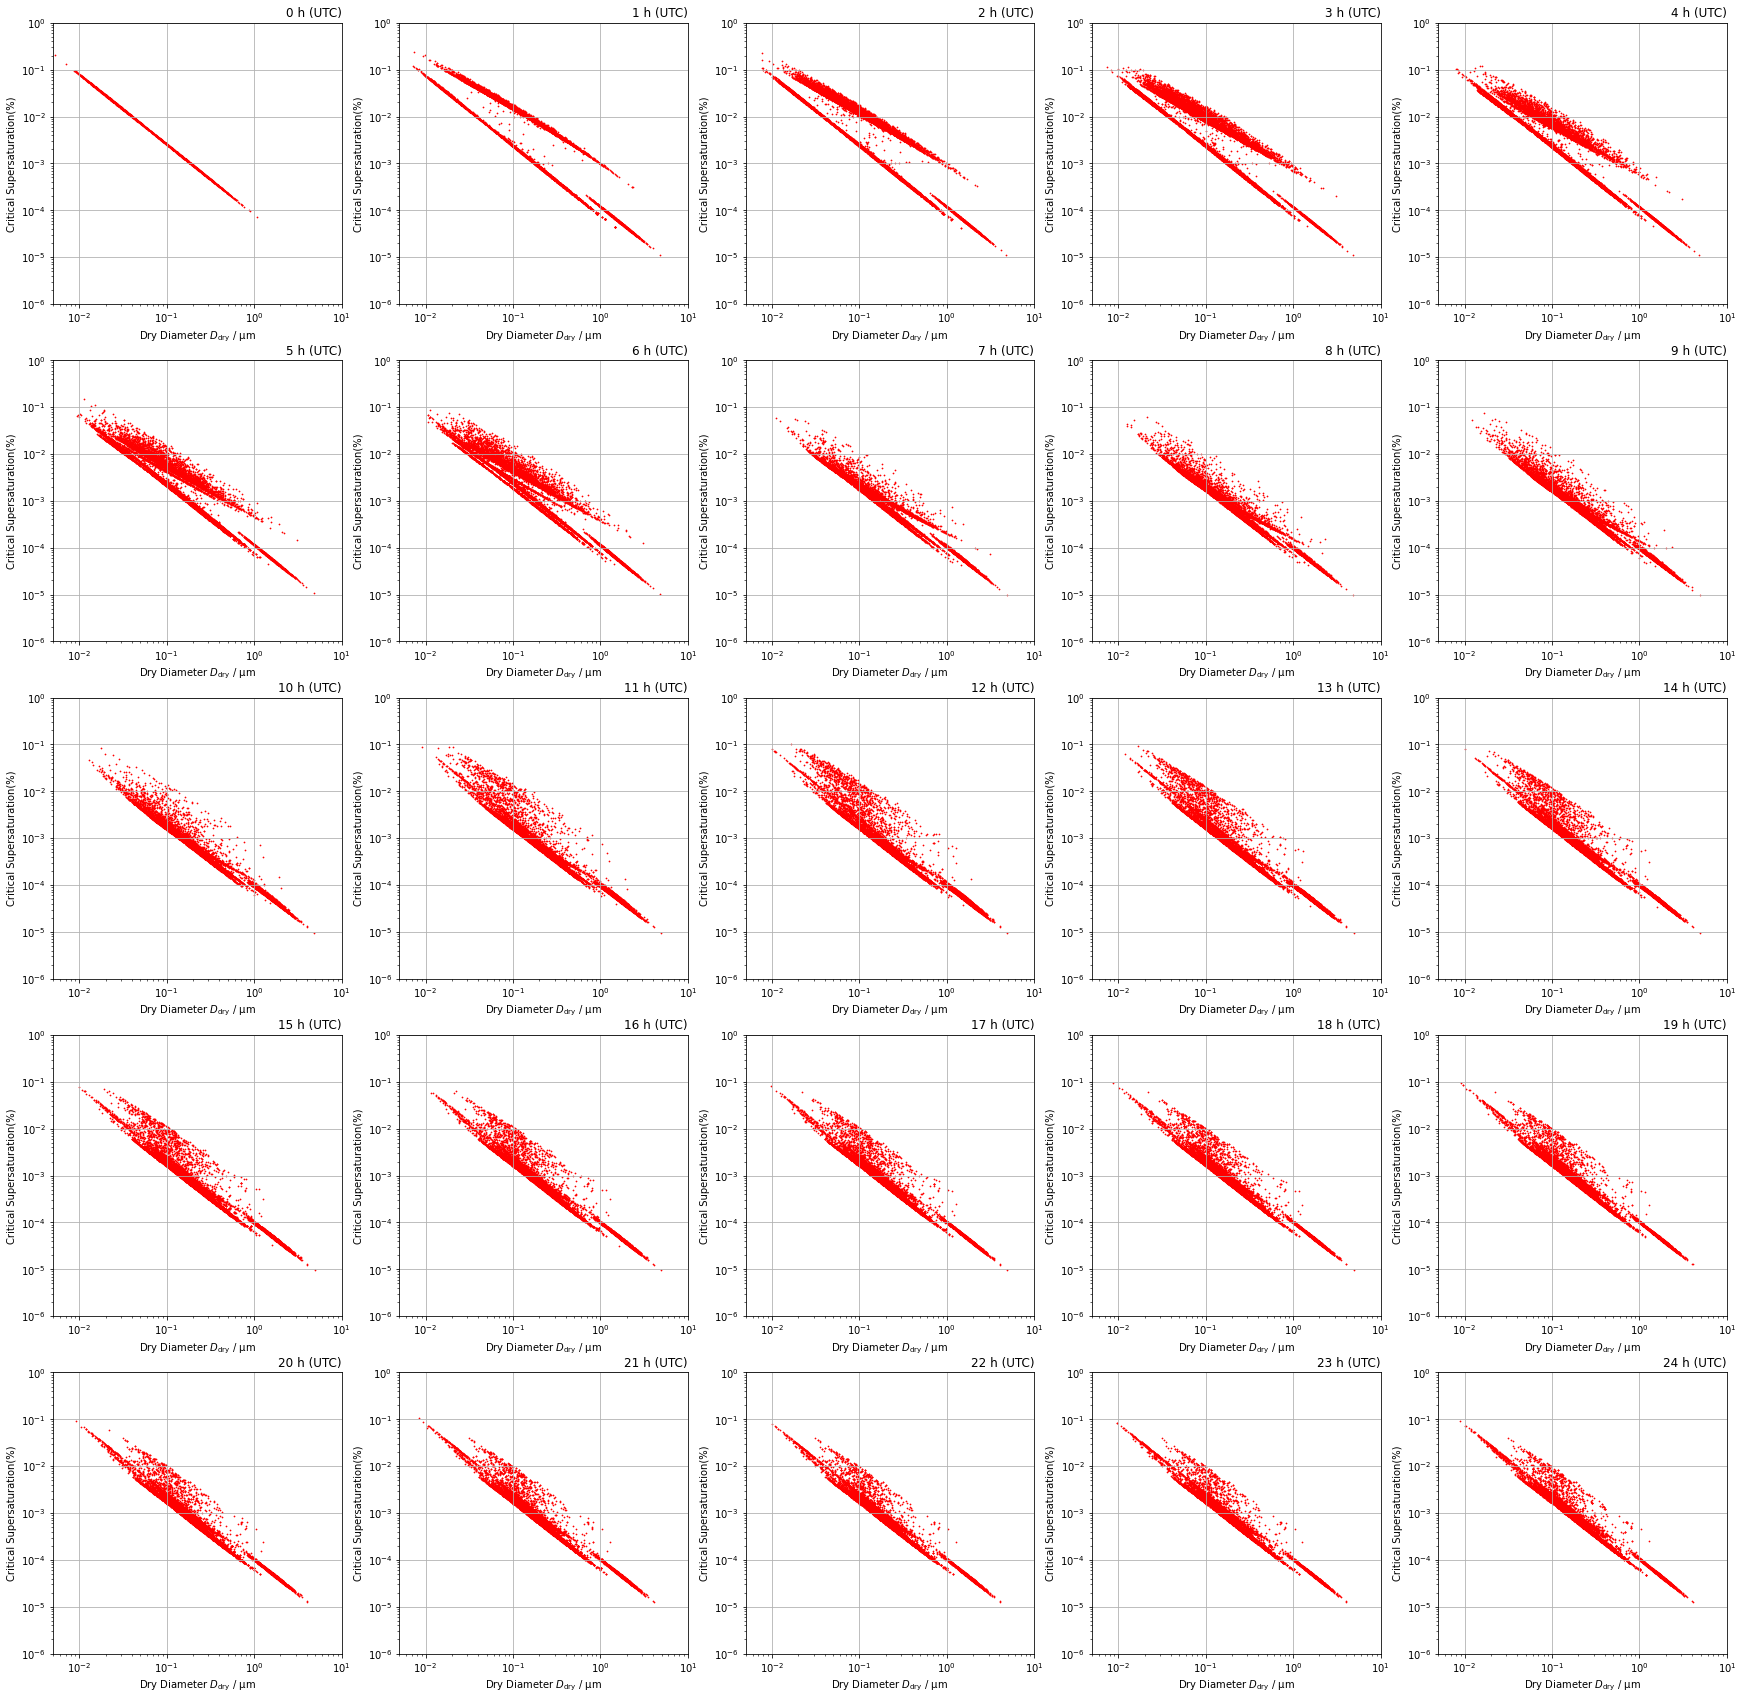

In [13]:
fig2 = plt.figure(figsize=(30,30))
directory = "/data/keeling/a/xx24/d/partmc/scenarios/1_urban_plume/do_coagulation"
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("single_particle_000000" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f = data.T
            f = pd.DataFrame(f)  
            dry_diameters = f.dry_diameters
            scs = f.scs

            ax = plt.subplot(5,5,time_index)
            ax = plt.scatter(dry_diameters * 1e6, scs, s = 2.5, linewidths = 0.1, c='r')
            plt.xscale("log")
            plt.xlabel(r"Dry Diameter $D_{\rm dry}$ / $\rm \mu m$")
            plt.xlim(5e-3, 1e1)
            plt.yscale("log")
            plt.ylabel(r"Critical Supersaturation(%)")
            plt.ylim(1e-6, 1e0)
            plt.grid(True)
            utc_time = time_index -1
            plt.title(str(utc_time)+' h (UTC)' , loc='right')

In [ ]:
fig3 = plt.figure(figsize=(40,30))
directory = "/data/keeling/a/xx24/d/partmc/scenarios/1_urban_plume/out"
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("single_particle_000000" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f = data.T
            f = pd.DataFrame(f)  
            dry_diameters = f.dry_diameters
            masses = f.masses
            dry_masses = f.dry_masses
            bc_masses = f.bc_masses
            bc_fracs = (bc_masses/dry_masses) * 1e2
            oc_masses = f.oc_masses
            oc_fracs = (oc_masses/dry_masses) * 1e2
            so4_masses = f.so4_masses
            so4_fracs = (so4_masses/dry_masses) * 1e2
            no3_masses = f.no3_masses
            no3_fracs = (no3_masses/dry_masses) * 1e2
            nh4_masses = f.nh4_masses
            nh4_fracs = (nh4_masses/dry_masses) * 1e2
            soa_masses = f.soa_masses
            soa_fracs = (soa_masses/dry_masses) * 1e2
            cl_masses = f.cl_masses
            cl_fracs = (cl_masses/dry_masses) * 1e2
            msa_masses = f.msa_masses
            msa_fracs = (msa_masses/dry_masses) * 1e2
            aro1_masses = f.aro1_masses
            aro1_fracs = (aro1_masses/dry_masses) * 1e2
            aro2_masses = f.aro2_masses
            aro2_fracs = (aro2_masses/dry_masses) * 1e2
            alk1_masses = f.alk1_masses
            alk1_fracs = (alk1_masses/dry_masses) * 1e2
            ole1_masses = f.ole1_masses
            ole1_fracs = (ole1_masses/dry_masses) * 1e2
            api1_masses = f.api1_masses
            api1_fracs = (api1_masses/dry_masses) * 1e2
            api2_masses = f.api2_masses
            api2_fracs = (api2_masses/dry_masses) * 1e2
            lim1_masses = f.lim1_masses
            lim1_fracs = (lim1_masses/dry_masses) * 1e2
            lim2_masses = f.lim2_masses
            lim2_fracs = (lim2_masses/dry_masses) * 1e2
            co3_masses = f.co3_masses
            co3_fracs = (co3_masses/dry_masses) * 1e2
            na_masses = f.na_masses
            na_fracs = (na_masses/dry_masses) * 1e2
            ca_masses = f.ca_masses
            ca_fracs = (ca_masses/dry_masses) * 1e2
            oin_masses = f.oin_masses
            oin_fracs = (oin_masses/dry_masses) * 1e2
            h2o_masses = f.h2o_masses
            h2o_fracs = (h2o_masses/dry_masses) * 1e2

            v_SO4 = so4_masses/aero_file.iloc[0,1]
            v_NO3 = no3_masses/aero_file.iloc[1,1]
            v_Cl = cl_masses/aero_file.iloc[2,1]
            v_NH4 = nh4_masses/aero_file.iloc[3,1]
            v_MSA = msa_masses/aero_file.iloc[4,1]
            v_ARO1 = aro1_masses/aero_file.iloc[5,1]
            v_ARO2 = aro2_masses/aero_file.iloc[6,1]
            v_ALK1 = alk1_masses/aero_file.iloc[7,1]
            v_OLE1 = ole1_masses/aero_file.iloc[8,1]
            v_API1 = api1_masses/aero_file.iloc[9,1]
            v_API2 = api2_masses/aero_file.iloc[10,1]
            v_LIM1 = lim1_masses/aero_file.iloc[11,1]
            v_LIM2 = lim2_masses/aero_file.iloc[12,1]
            v_CO3 = co3_masses/aero_file.iloc[13,1]
            v_Na = na_masses/aero_file.iloc[14,1]
            v_Ca = ca_masses/aero_file.iloc[15,1]
            v_OIN = oin_masses/aero_file.iloc[16,1]
            v_OC = oc_masses/aero_file.iloc[17,1]
            v_BC = bc_masses/aero_file.iloc[18,1]
            v_H2O = h2o_masses/aero_file.iloc[19,1]
            v_total = v_SO4+v_NO3+v_Cl+v_NH4+v_MSA+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+ \
                    v_API2+v_LIM1+v_LIM2+v_CO3+v_Na+v_OIN+v_OC+v_BC+v_H2O
            kappa_single = (v_SO4 * aero_file.iloc[0,4] + v_NO3 *  aero_file.iloc[1,4] + \
                            v_Cl * aero_file.iloc[2,4] + v_NH4 * aero_file.iloc[3,4] + \
                            v_MSA * aero_file.iloc[4,4] + v_ARO1 * aero_file.iloc[5,4] + \
                            v_ARO2 * aero_file.iloc[6,4] + v_ALK1 * aero_file.iloc[7,4] + \
                            v_OLE1 * aero_file.iloc[8,4] + v_API1 * aero_file.iloc[9,4] + \
                            v_API2 * aero_file.iloc[10,4] + v_LIM1 * aero_file.iloc[11,4] + \
                            v_LIM2 * aero_file.iloc[12,4] + v_CO3 * aero_file.iloc[13,4] + \
                            v_Na * aero_file.iloc[14,4] + v_Ca * aero_file.iloc[15,4] + \
                            v_OIN * aero_file.iloc[16,4] + v_OC * aero_file.iloc[17,4] + \
                            v_BC * aero_file.iloc[18,4] + v_H2O * aero_file.iloc[19,4] )/v_total


            ax3 = plt.subplot(5,5,time_index)
            ax3 = plt.scatter(dry_diameters * 1e6, bc_fracs, c = kappa_single, s = 2.5)
            plt.xscale("log")
            plt.xlabel(r"Dry Diameter $D_{\rm dry}$ / $\rm \mu m$")
            plt.xlim(1e-2, 1e0)
            plt.yscale("linear")
            plt.ylabel("BC Mass Fraction (%)")
            plt.ylim(0, 80)
            plt.grid(True)
            utc_time = time_index -1
            plt.title(str(utc_time)+' h (UTC)' , loc='right')

            plt.grid(True)

            plt.colorbar(ax3, label="Hygroscopicity, $\kappa$")
            plt.set_cmap("rainbow")
            plt.clim(0, 0.5)


In [ ]:
fig = plt.figure(figsize=(45,35))
directory = "/data/keeling/a/xx24/d/partmc/scenarios/1_urban_plume/out"
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("single_particle_000000" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f = data.T
            f = pd.DataFrame(f)  
            dry_diameters = f.dry_diameters
            masses = f.masses
            dry_masses = f.dry_masses
            bc_masses = f.bc_masses
            bc_fracs = (bc_masses/dry_masses) * 1e2
            oc_masses = f.oc_masses
            oc_fracs = (oc_masses/dry_masses) * 1e2
            so4_masses = f.so4_masses
            so4_fracs = (so4_masses/dry_masses) * 1e2
            no3_masses = f.no3_masses
            no3_fracs = (no3_masses/dry_masses) * 1e2
            nh4_masses = f.nh4_masses
            nh4_fracs = (nh4_masses/dry_masses) * 1e2
            soa_masses = f.soa_masses
            soa_fracs = (soa_masses/dry_masses) * 1e2
            cl_masses = f.cl_masses
            cl_fracs = (cl_masses/dry_masses) * 1e2
            msa_masses = f.msa_masses
            msa_fracs = (msa_masses/dry_masses) * 1e2
            aro1_masses = f.aro1_masses
            aro1_fracs = (aro1_masses/dry_masses) * 1e2
            aro2_masses = f.aro2_masses
            aro2_fracs = (aro2_masses/dry_masses) * 1e2
            alk1_masses = f.alk1_masses
            alk1_fracs = (alk1_masses/dry_masses) * 1e2
            ole1_masses = f.ole1_masses
            ole1_fracs = (ole1_masses/dry_masses) * 1e2
            api1_masses = f.api1_masses
            api1_fracs = (api1_masses/dry_masses) * 1e2
            api2_masses = f.api2_masses
            api2_fracs = (api2_masses/dry_masses) * 1e2
            lim1_masses = f.lim1_masses
            lim1_fracs = (lim1_masses/dry_masses) * 1e2
            lim2_masses = f.lim2_masses
            lim2_fracs = (lim2_masses/dry_masses) * 1e2
            co3_masses = f.co3_masses
            co3_fracs = (co3_masses/dry_masses) * 1e2
            na_masses = f.na_masses
            na_fracs = (na_masses/dry_masses) * 1e2
            ca_masses = f.ca_masses
            ca_fracs = (ca_masses/dry_masses) * 1e2
            oin_masses = f.oin_masses
            oin_fracs = (oin_masses/dry_masses) * 1e2
            h2o_masses = f.h2o_masses
            h2o_fracs = (h2o_masses/dry_masses) * 1e2

            v_SO4 = so4_masses/aero_file.iloc[0,1]
            v_NO3 = no3_masses/aero_file.iloc[1,1]
            v_Cl = cl_masses/aero_file.iloc[2,1]
            v_NH4 = nh4_masses/aero_file.iloc[3,1]
            v_MSA = msa_masses/aero_file.iloc[4,1]
            v_ARO1 = aro1_masses/aero_file.iloc[5,1]
            v_ARO2 = aro2_masses/aero_file.iloc[6,1]
            v_ALK1 = alk1_masses/aero_file.iloc[7,1]
            v_OLE1 = ole1_masses/aero_file.iloc[8,1]
            v_API1 = api1_masses/aero_file.iloc[9,1]
            v_API2 = api2_masses/aero_file.iloc[10,1]
            v_LIM1 = lim1_masses/aero_file.iloc[11,1]
            v_LIM2 = lim2_masses/aero_file.iloc[12,1]
            v_CO3 = co3_masses/aero_file.iloc[13,1]
            v_Na = na_masses/aero_file.iloc[14,1]
            v_Ca = ca_masses/aero_file.iloc[15,1]
            v_OIN = oin_masses/aero_file.iloc[16,1]
            v_OC = oc_masses/aero_file.iloc[17,1]
            v_BC = bc_masses/aero_file.iloc[18,1]
            v_H2O = h2o_masses/aero_file.iloc[19,1]
            v_total = v_SO4+v_NO3+v_Cl+v_NH4+v_MSA+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+ \
                    v_API2+v_LIM1+v_LIM2+v_CO3+v_Na+v_OIN+v_OC+v_BC+v_H2O

            v_dry = v_total - v_H2O
            v_wet = v_total
            v_org = v_OC+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+v_API2+v_LIM1+v_LIM2
            # f_org = v_org/v_dry #fraction of orgranic

            r_wet = ((3 * v_wet) / (4 * np.pi)) ** (1 / 3) # convert wet volume to wet radius
            # v_delta = v_wet - (((4 * np.pi) / 3) * (r_wet - delta_min) ** 3) # calculate the minimum shell volume, v_delta
            # v_beta = f_org * v_dry # calculate the total volume of organic, v_beta
            v_delta = (4 * np.pi/3)*((r_wet) ** 3 - (r_wet - delta_min) ** 3)
            v_beta = v_org
            c_beta = np.minimum(v_beta / v_delta, 1) # calculate the coverage parameter
            sgm = (1 - c_beta) * sgm_w + c_beta * sgm_org # calculate sigma

            ax4 = plt.subplot(5,5,time_index)
            ax4.scatter(dry_diameters * 1e6, sgm, s = 2.5, c = 'r')
            ax4.set_xscale('log')
            ax4.set_yticks(np.arange(35,75,5))
            # ax4.set_yticks()  
            ax4.set_xlabel('Dry Diameter ($\mu m$)')
            ax4.set_ylabel('Surface Tension $\sigma$ ($mN\ m^{-1}$)')     

            ax5 = ax4.twinx()
            ax5.set_xscale('log')
            ax5.scatter(dry_diameters * 1e6, c_beta, s = 2.5, c = 'g')
            ax5.set_ylim(-0.2,1.2)
            ax5.set_ylabel(r'Surface Coverage $C_{\beta}$')
            utc_time = time_index -1
            plt.title(str(utc_time)+' h (UTC)' , loc='right')


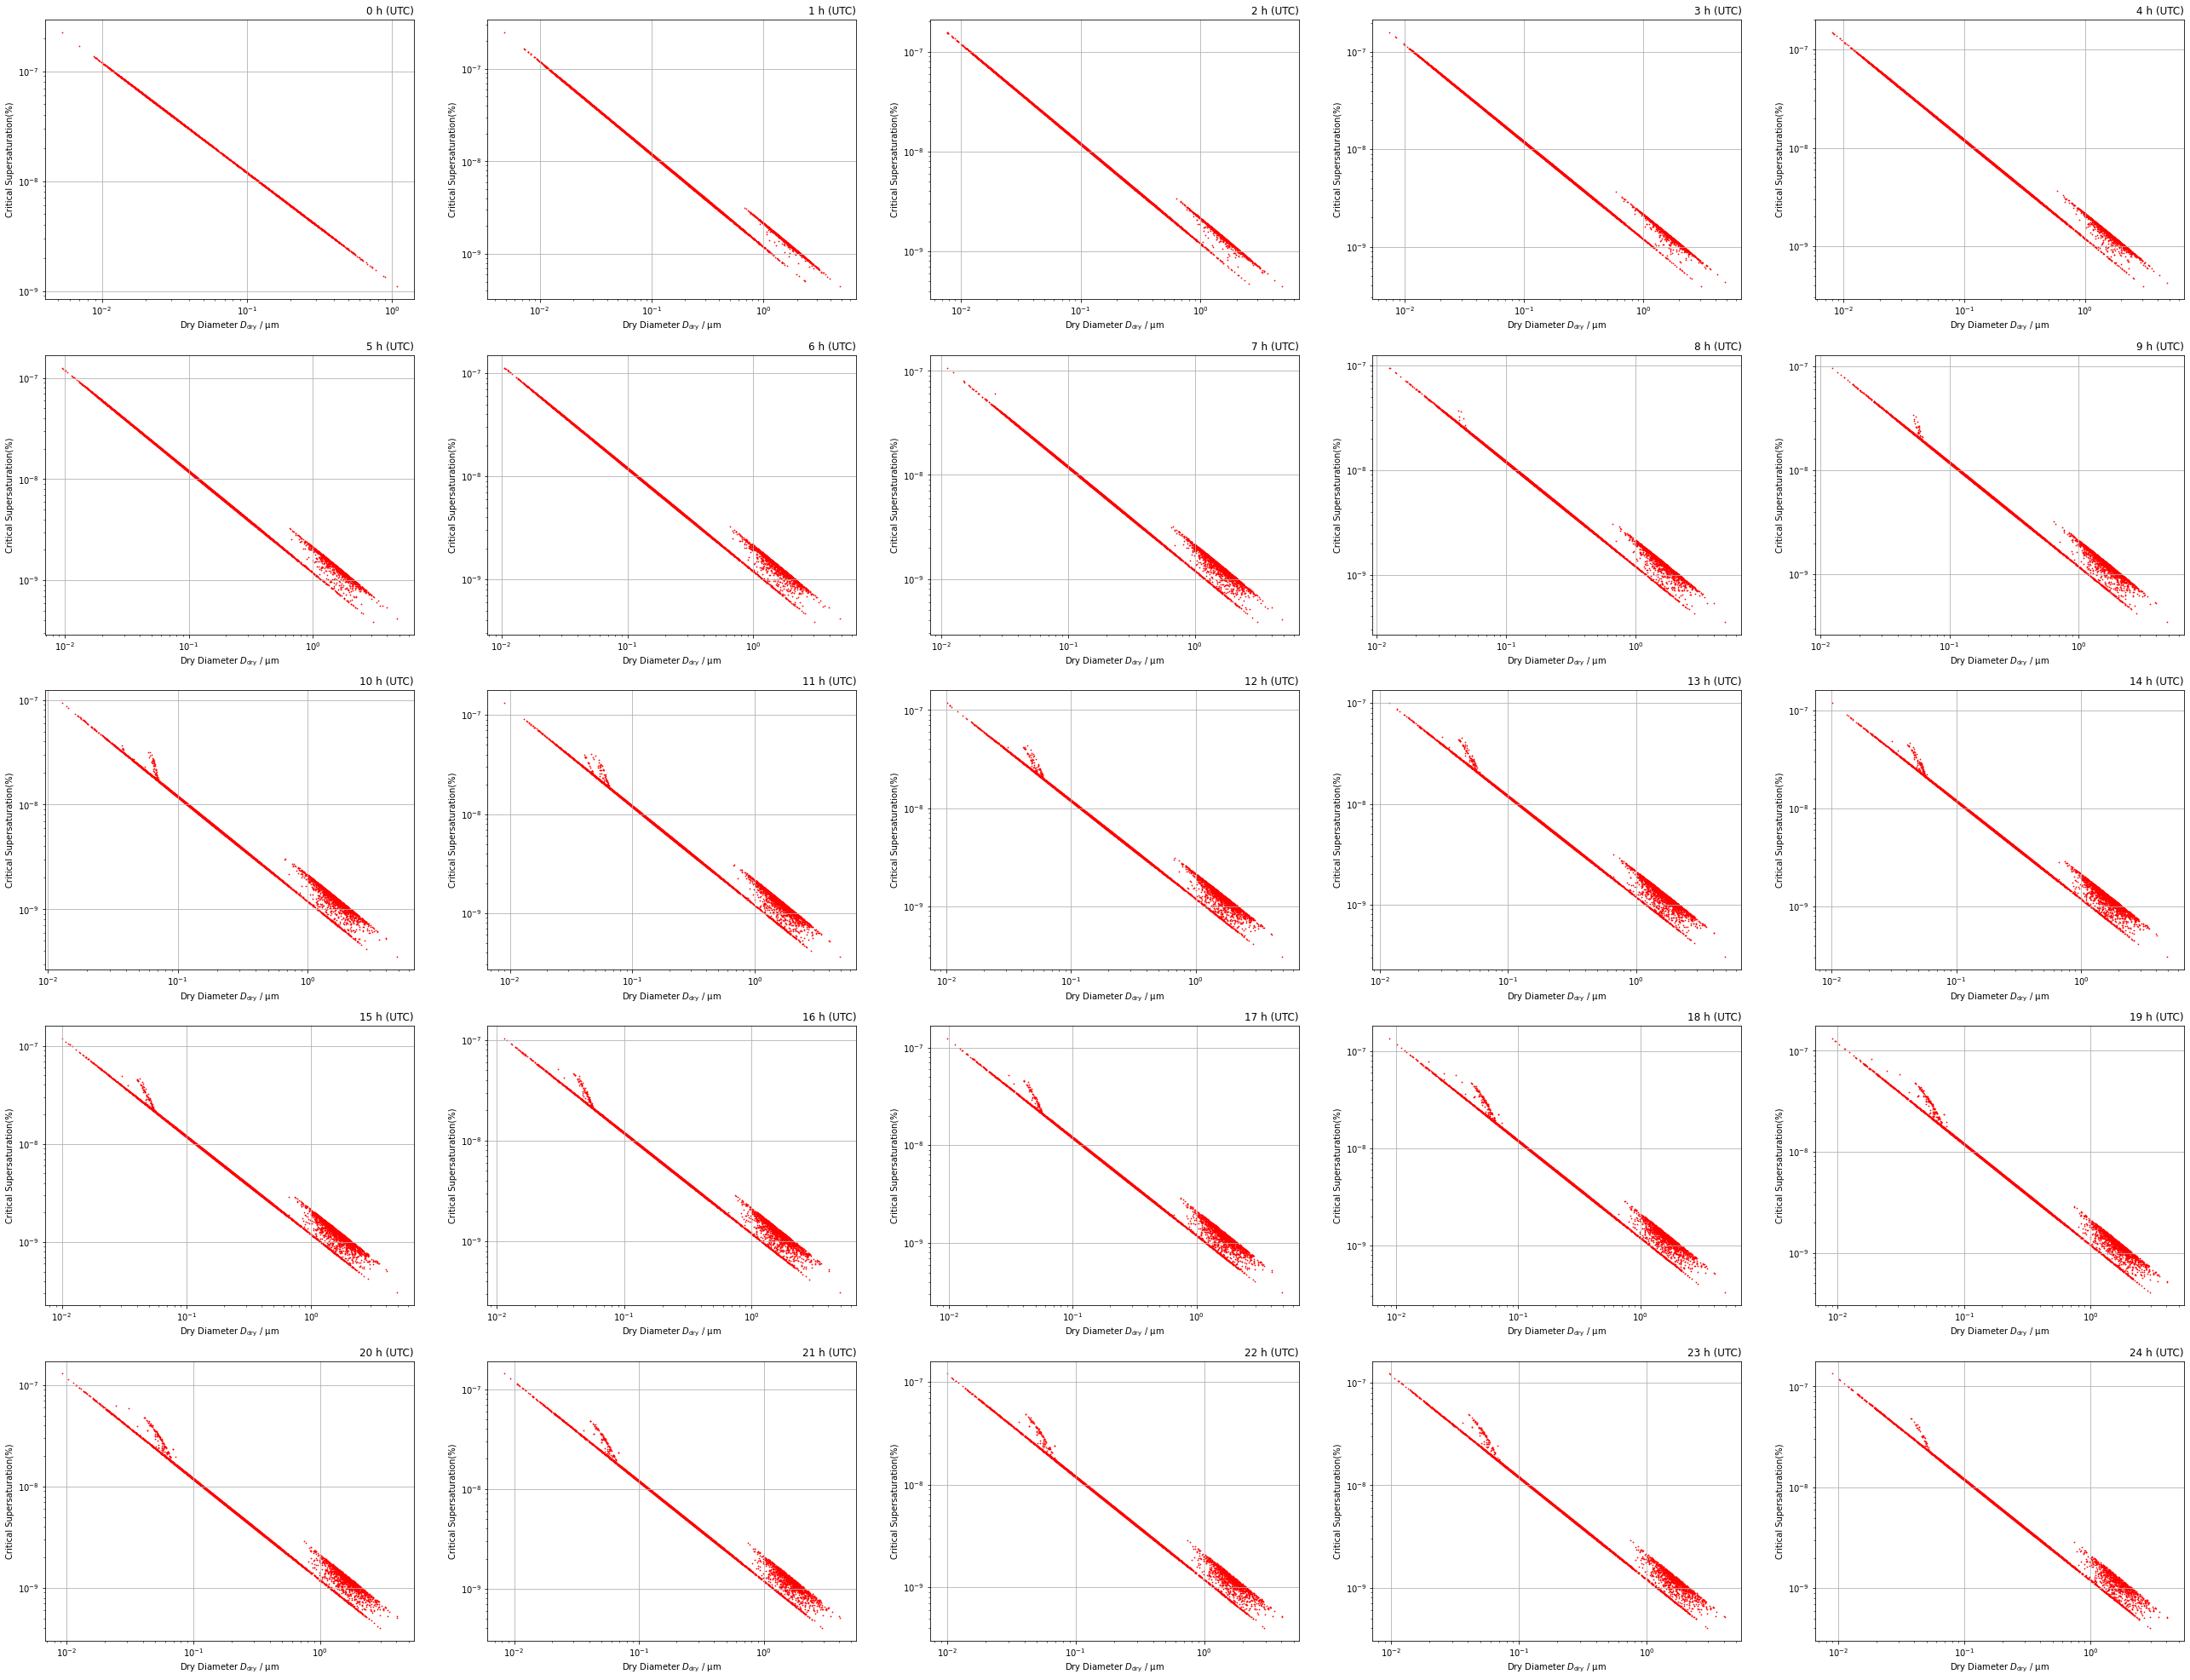

In [10]:
fig_scs_sgm = plt.figure(figsize=(45,35))
directory = "/data/keeling/a/xx24/d/partmc/scenarios/1_urban_plume/do_coagulation"
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("single_particle_000000" in filename):
            time_index = int(filename[-6:-4])
            file = pd.read_csv(filename, sep='\s+', header=None)
            data = file.set_index(0)
            f = data.T
            f = pd.DataFrame(f)  
            dry_diameters = f.dry_diameters
            masses = f.masses
            dry_masses = f.dry_masses
            bc_masses = f.bc_masses
            bc_fracs = (bc_masses/dry_masses) * 1e2
            oc_masses = f.oc_masses
            oc_fracs = (oc_masses/dry_masses) * 1e2
            so4_masses = f.so4_masses
            so4_fracs = (so4_masses/dry_masses) * 1e2
            no3_masses = f.no3_masses
            no3_fracs = (no3_masses/dry_masses) * 1e2
            nh4_masses = f.nh4_masses
            nh4_fracs = (nh4_masses/dry_masses) * 1e2
            soa_masses = f.soa_masses
            soa_fracs = (soa_masses/dry_masses) * 1e2
            cl_masses = f.cl_masses
            cl_fracs = (cl_masses/dry_masses) * 1e2
            msa_masses = f.msa_masses
            msa_fracs = (msa_masses/dry_masses) * 1e2
            aro1_masses = f.aro1_masses
            aro1_fracs = (aro1_masses/dry_masses) * 1e2
            aro2_masses = f.aro2_masses
            aro2_fracs = (aro2_masses/dry_masses) * 1e2
            alk1_masses = f.alk1_masses
            alk1_fracs = (alk1_masses/dry_masses) * 1e2
            ole1_masses = f.ole1_masses
            ole1_fracs = (ole1_masses/dry_masses) * 1e2
            api1_masses = f.api1_masses
            api1_fracs = (api1_masses/dry_masses) * 1e2
            api2_masses = f.api2_masses
            api2_fracs = (api2_masses/dry_masses) * 1e2
            lim1_masses = f.lim1_masses
            lim1_fracs = (lim1_masses/dry_masses) * 1e2
            lim2_masses = f.lim2_masses
            lim2_fracs = (lim2_masses/dry_masses) * 1e2
            co3_masses = f.co3_masses
            co3_fracs = (co3_masses/dry_masses) * 1e2
            na_masses = f.na_masses
            na_fracs = (na_masses/dry_masses) * 1e2
            ca_masses = f.ca_masses
            ca_fracs = (ca_masses/dry_masses) * 1e2
            oin_masses = f.oin_masses
            oin_fracs = (oin_masses/dry_masses) * 1e2
            h2o_masses = f.h2o_masses
            h2o_fracs = (h2o_masses/dry_masses) * 1e2

            v_SO4 = so4_masses/aero_file.iloc[0,1]
            v_NO3 = no3_masses/aero_file.iloc[1,1]
            v_Cl = cl_masses/aero_file.iloc[2,1]
            v_NH4 = nh4_masses/aero_file.iloc[3,1]
            v_MSA = msa_masses/aero_file.iloc[4,1]
            v_ARO1 = aro1_masses/aero_file.iloc[5,1]
            v_ARO2 = aro2_masses/aero_file.iloc[6,1]
            v_ALK1 = alk1_masses/aero_file.iloc[7,1]
            v_OLE1 = ole1_masses/aero_file.iloc[8,1]
            v_API1 = api1_masses/aero_file.iloc[9,1]
            v_API2 = api2_masses/aero_file.iloc[10,1]
            v_LIM1 = lim1_masses/aero_file.iloc[11,1]
            v_LIM2 = lim2_masses/aero_file.iloc[12,1]
            v_CO3 = co3_masses/aero_file.iloc[13,1]
            v_Na = na_masses/aero_file.iloc[14,1]
            v_Ca = ca_masses/aero_file.iloc[15,1]
            v_OIN = oin_masses/aero_file.iloc[16,1]
            v_OC = oc_masses/aero_file.iloc[17,1]
            v_BC = bc_masses/aero_file.iloc[18,1]
            v_H2O = h2o_masses/aero_file.iloc[19,1]
            v_total = v_SO4+v_NO3+v_Cl+v_NH4+v_MSA+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+ \
                    v_API2+v_LIM1+v_LIM2+v_CO3+v_Na+v_OIN+v_OC+v_BC+v_H2O

            v_dry = v_total - v_H2O
            v_wet = v_total
            v_org = v_OC+v_ARO1+v_ARO2+v_ALK1+v_OLE1+v_API1+v_API2+v_LIM1+v_LIM2

            r_wet = ((3 * v_wet) / (4 * np.pi)) ** (1 / 3) # convert wet volume to wet radius
            v_delta = (4 * np.pi/3)*((r_wet) ** 3 - (r_wet - delta_min) ** 3)
            v_beta = v_org
            c_beta = np.minimum(v_beta / v_delta, 1) # calculate the coverage parameter
            sgm = (1 - c_beta) * sgm_w + c_beta * sgm_org # calculate sigma

            crit_ss = np.exp((4*sgm*1e-3*water_molec_weight)/(univ_gas_const*temp*water_density*dry_diameters*1e6))-1
            

            # print(np.size(dry_diameters), np.size(sgm),np.size(crit_ss))

            ax = plt.subplot(5,5,time_index)
            ax = plt.scatter(dry_diameters * 1e6, crit_ss, s = 2.5, linewidths = 0.1, c='r')
            plt.xscale("log")
            plt.xlabel(r"Dry Diameter $D_{\rm dry}$ / $\rm \mu m$")
            # plt.xlim(5e-3, 1e1)
            plt.yscale("log")
            plt.ylabel(r"Critical Supersaturation(%)")
            # plt.ylim(1e-6, 1e0)
            plt.grid(True)
            utc_time = time_index -1
            plt.title(str(utc_time)+' h (UTC)' , loc='right')



